In [425]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import warnings
warnings.filterwarnings('ignore')

In [426]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report, f1_score

In [427]:
df = pd.read_csv('income.csv')
df.head(3)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000


In [428]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Text(0, 0.5, 'Income($)')

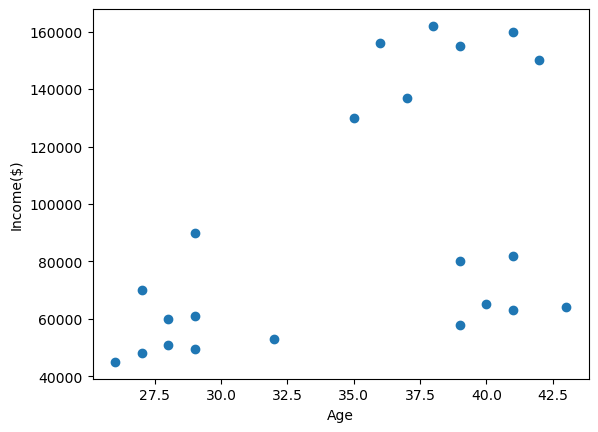

In [429]:
plt.scatter(df['Age'], df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [430]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [431]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [432]:
df.isnull().sum()

Name         0
Age          0
Income($)    0
cluster      0
dtype: int64

In [433]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

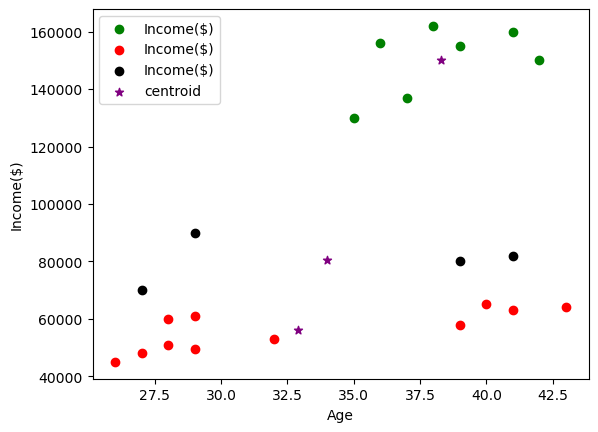

In [434]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label = 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'black', label = 'Income($)')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [435]:
# In this plot, here is a problem it is not correct clustering, because of scaling ==> we have to scale it then it will correct.

In [436]:
scaler = MinMaxScaler()
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df['Age'] = scaler.fit_transform(df[['Age']])

In [437]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


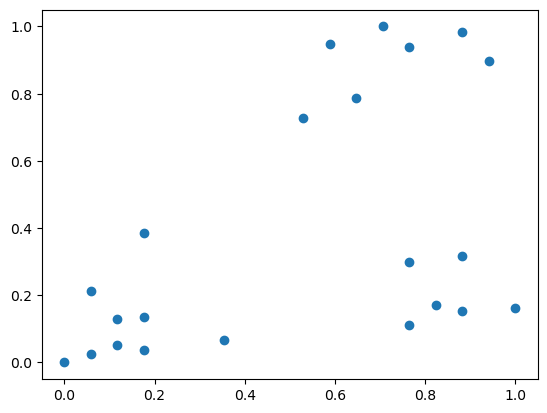

In [438]:
plt.scatter(df['Age'], df['Income($)'])

In [439]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [440]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [441]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

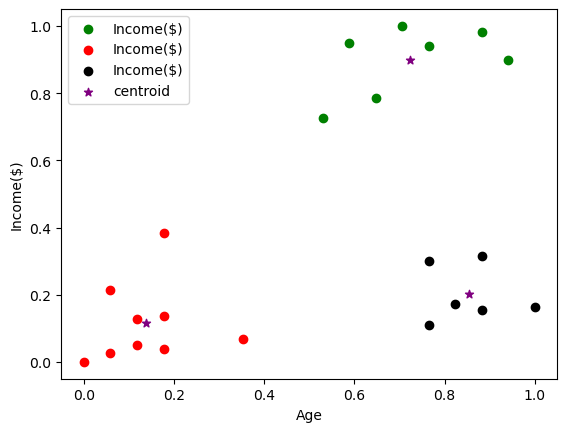

In [442]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color = 'green', label = 'Income($)')
plt.scatter(df2.Age, df2['Income($)'], color = 'red', label = 'Income($)')
plt.scatter(df3.Age, df3['Income($)'], color = 'black', label = 'Income($)')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'purple', marker = '*', label = 'centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [443]:
# Elbow plot
sse = []
for k in range(2,10):
    km = KMeans(n_clusters= k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [444]:
# Select value of K when inertia is very low point.

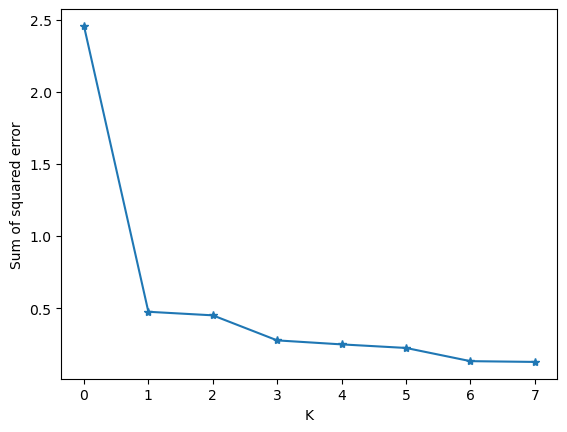

In [445]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(sse, marker = "*")

In [446]:
# It is completed --------------------

In [447]:
##########################

In [448]:
# Now we are working on next dataset. ==> "Mall_Customers.csv"

In [449]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [450]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [451]:
df.duplicated().sum()

0

In [452]:
X = df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [453]:
from sklearn.cluster import KMeans

In [454]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

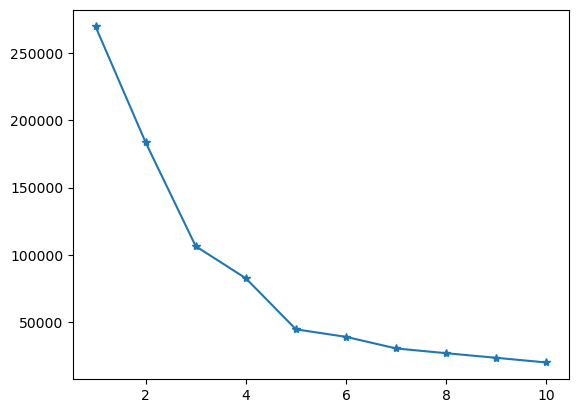

In [455]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss, marker = "*")

In [456]:
km = KMeans(n_clusters = 5)
y_means = km.fit_predict(X)

In [457]:
y_means

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

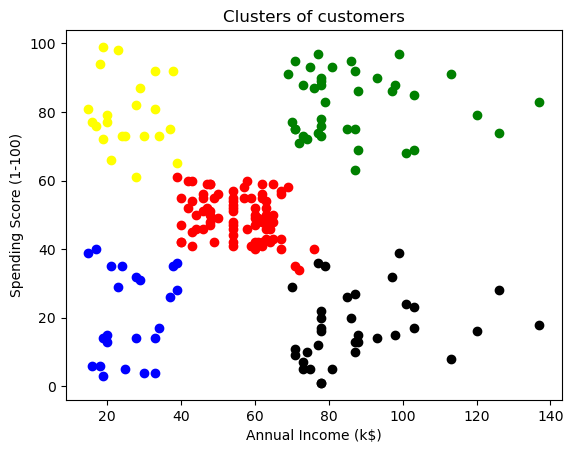

In [458]:
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], color = 'blue')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], color = 'red')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], color = 'green')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], color = 'yellow')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], color = 'black')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [459]:
df['Target'] = y_means

In [460]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [461]:
Clustered_df = df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [462]:
# Now it is Supervised data, we will perform here DT, RF algos.

In [463]:
Clustered_df['Target'].value_counts()

Target
1    81
2    39
4    35
0    23
3    22
Name: count, dtype: int64

In [464]:
# Encoding 
categorical = Clustered_df.select_dtypes(include = 'object')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical:
    Clustered_df[i] = le.fit_transform(Clustered_df[i])

Clustered_df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Target
0,1,1,19,15,39,0
1,2,1,21,15,81,3
2,3,0,20,16,6,0


In [465]:
# Now our data is ready for classification.
# Split
X = Clustered_df.drop('Target', axis = 1)
y = Clustered_df['Target']

In [466]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [467]:
# model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state = 42)

In [468]:
# use algo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [469]:
# predict
y_pred = dtc.predict(X_test)

In [470]:
from sklearn.metrics import classification_report, confusion_matrix

In [471]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.89      0.96      0.92        25
           2       1.00      0.90      0.95        10
           3       0.83      1.00      0.91         5
           4       1.00      0.87      0.93        15

    accuracy                           0.93        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.94      0.93      0.93        60



In [472]:
print(classification_report( y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.96      0.89      0.92        27
           2       0.90      1.00      0.95         9
           3       1.00      0.83      0.91         6
           4       0.87      1.00      0.93        13

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [473]:
# Now randomforest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [474]:
y_perd = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.96      0.89      0.92        27
           2       0.90      1.00      0.95         9
           3       1.00      0.83      0.91         6
           4       0.87      1.00      0.93        13

    accuracy                           0.93        60
   macro avg       0.95      0.94      0.94        60
weighted avg       0.94      0.93      0.93        60



In [475]:
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [476]:
# It is completed --------------------------------

In [477]:
###############################################

In [478]:
# Working on next dataset.

In [479]:
df = pd.read_excel('Product groups.xlsx')
df.head(3)

,Product Family,Sum of count of orders,Avg product weight in Kg
0,agro industry and commerce,212,5.263405
1,foods,510,0.923415
2,food drinks,278,1.307933


In [480]:
# create two separate variable to get the count and weight for the product family.
# This is formulae.
df['count_variable'] = (df['Sum of count of orders'] - df['Sum of count of orders'].min()) / (df['Sum of count of orders'].max() - df['Sum of count of orders'].min())

df['weight_variable'] = (df['Avg product weight in Kg'] - df['Avg product weight in Kg'].min()) / (df['Avg product weight in Kg'].max() - df['Avg product weight in Kg'].min())

In [481]:
df.head()

,Product Family,Sum of count of orders,Avg product weight in Kg,count_variable,weight_variable
0,agro industry and commerce,212,5.263405,0.018897,0.388073
1,foods,510,0.923415,0.045712,0.053029
2,food drinks,278,1.307933,0.024836,0.082713
3,Arts,209,1.691764,0.018627,0.112345
4,arts and crafts,24,1.164579,0.001980,0.071647


In [482]:
df_copy = df[['Product Family', 'count_variable', 'weight_variable']]
df_copy

,Product Family,count_variable,weight_variable
0,agro industry and commerce,0.018897,0.388073
1,foods,0.045712,0.053029
2,food drinks,0.024836,0.082713
3,Arts,0.018627,0.112345
4,arts and crafts,0.001980,0.071647
...,...,...,...
68,sinalizacao and seguranca,0.017727,0.211010
69,printed tablets or imagem,0.007289,0.011189
70,telephony,0.408801,0.000000
71,fixed telephone,0.023576,0.032757


In [483]:
clustering = KMeans(n_clusters = 5)
clustering.fit(df_copy[['count_variable', 'weight_variable']])
df_copy['count and weight Cluster'] = clustering.labels_
df_copy.head()

,Product Family,count_variable,weight_variable,count and weight Cluster
0,agro industry and commerce,0.018897,0.388073,3
1,foods,0.045712,0.053029,0
2,food drinks,0.024836,0.082713,0
3,Arts,0.018627,0.112345,0
4,arts and crafts,0.001980,0.071647,0


In [484]:
clustering.cluster_centers_

array([[0.02327877, 0.05588538],
       [0.78795105, 0.14699085],
       [0.03919477, 0.80193062],
       [0.04232986, 0.25821035],
       [0.34895168, 0.12195746]])

In [485]:
clustering.inertia_

0.6210598871558834

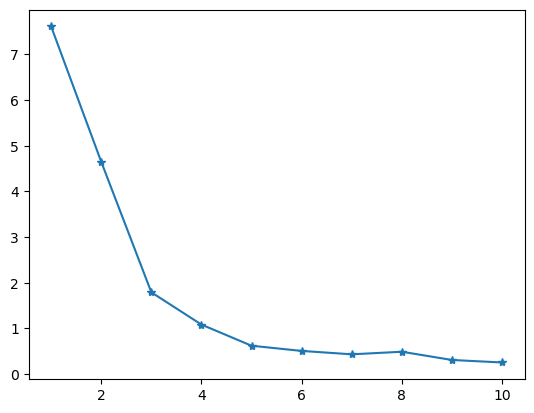

In [486]:
inertia_scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_copy[['count_variable', 'weight_variable']])
    inertia_scores.append(kmeans.inertia_)
plt.plot(range(1,11), inertia_scores, marker = "*")